In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
print(df.duplicated().sum(), 'duplicates')
df = df.drop_duplicates()
print(df.duplicated().sum(), 'duplicates after removing them')

240 duplicates
0 duplicates after removing them


In [7]:
df.quality.nunique()

6

<Axes: >

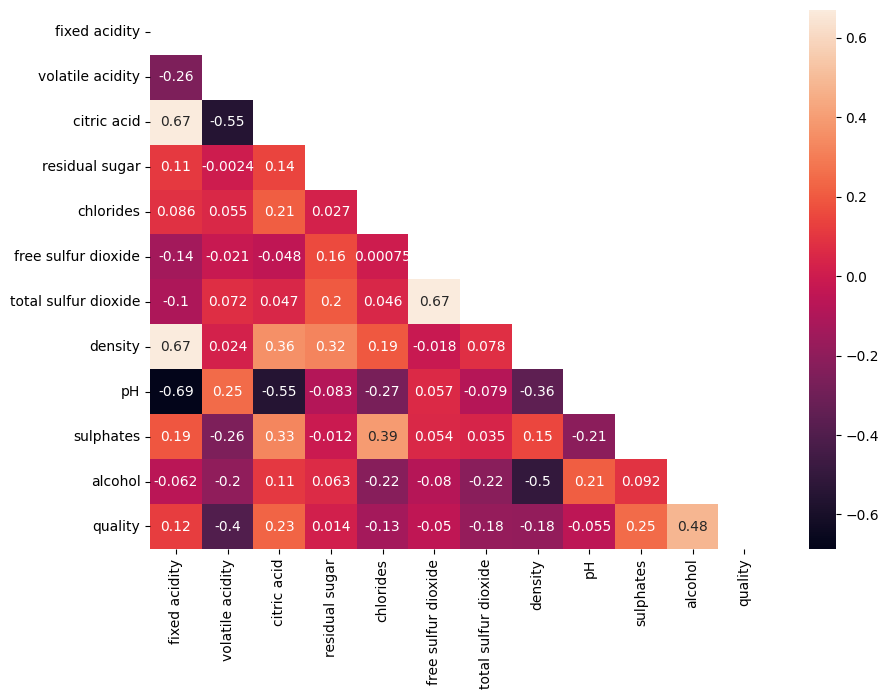

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask)

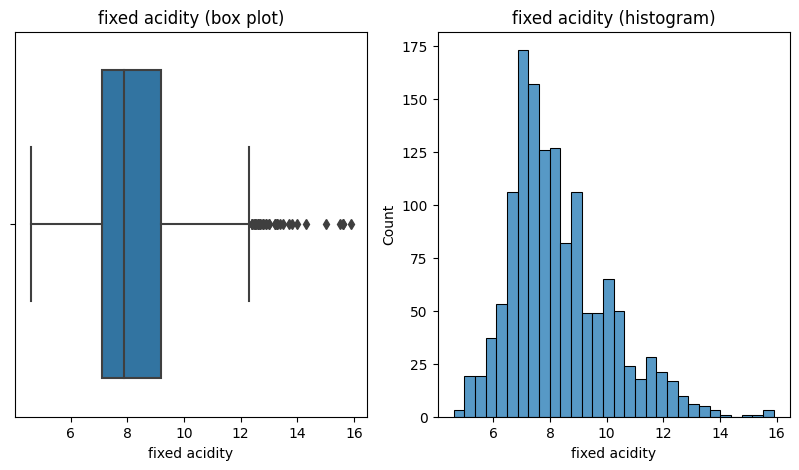

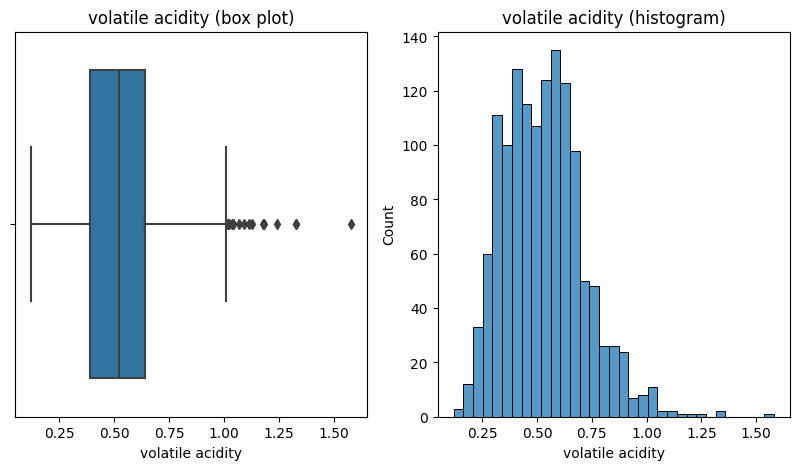

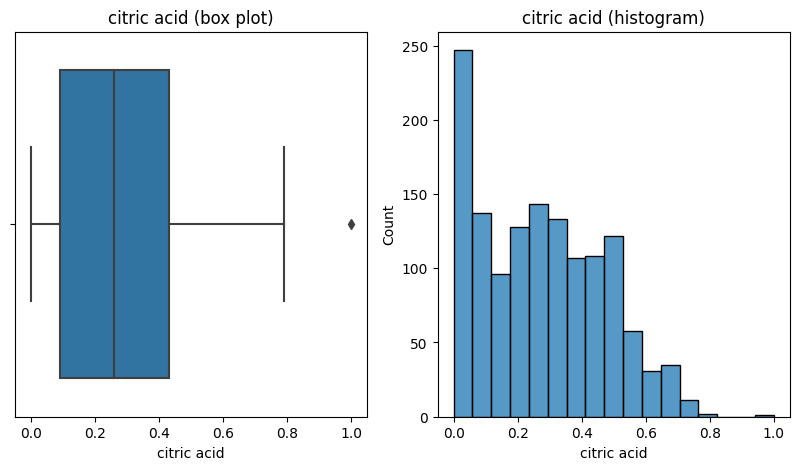

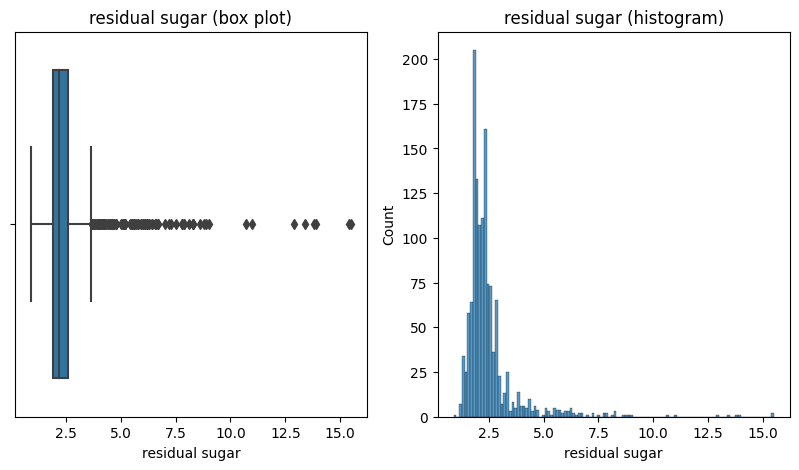

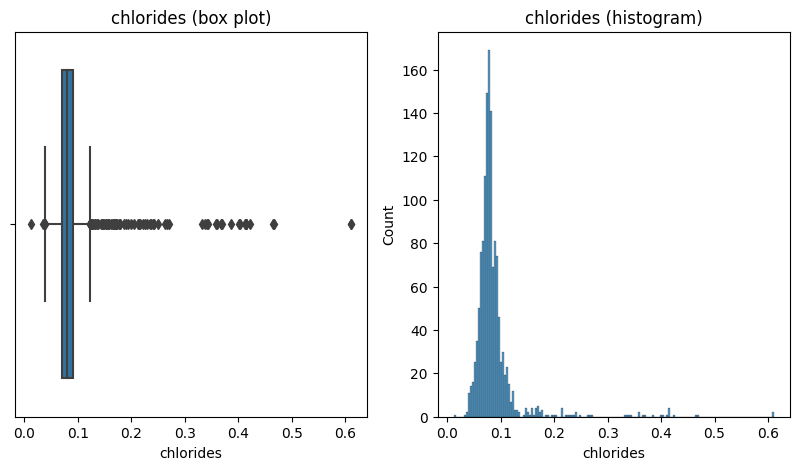

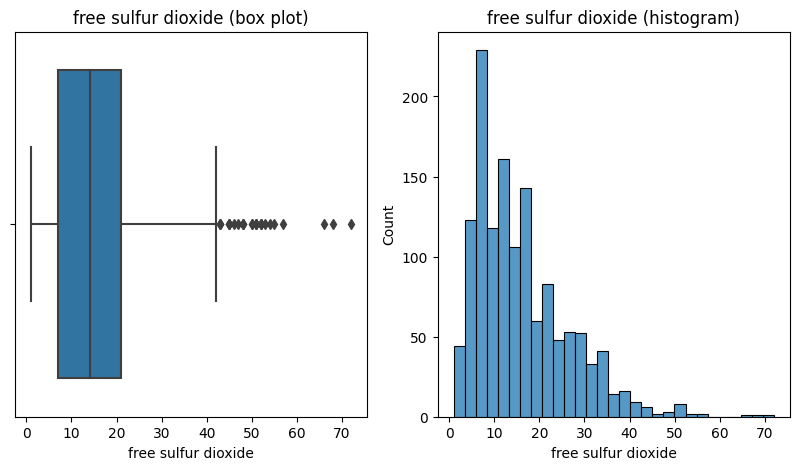

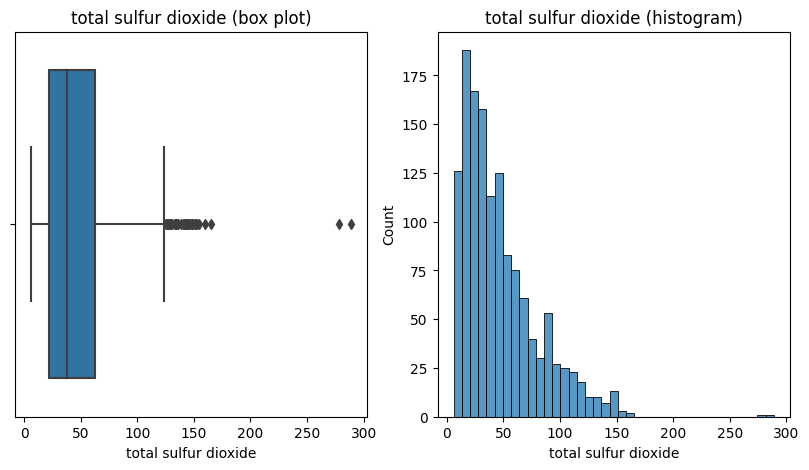

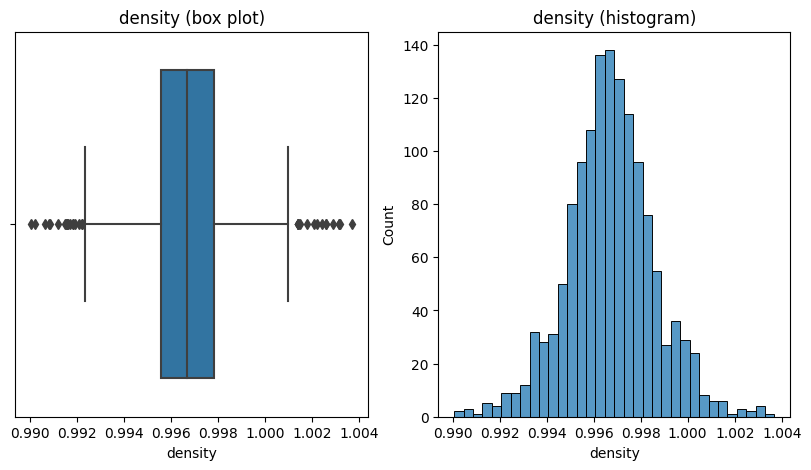

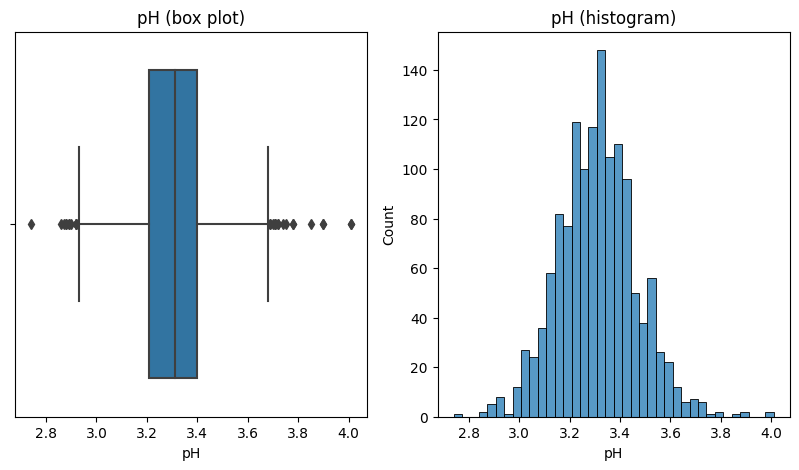

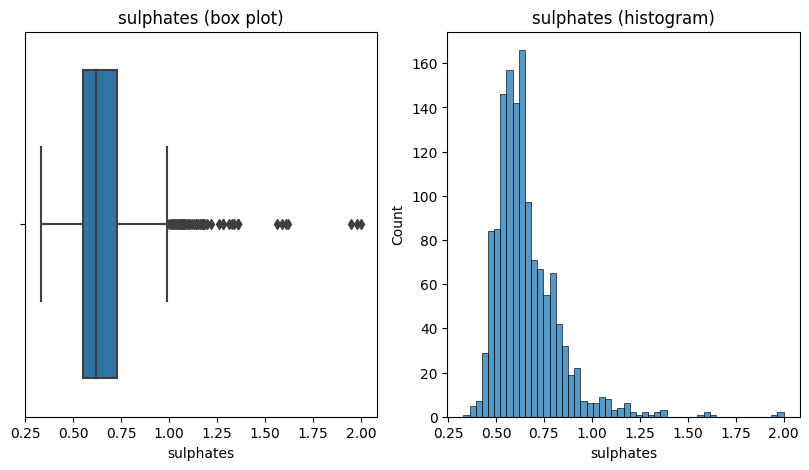

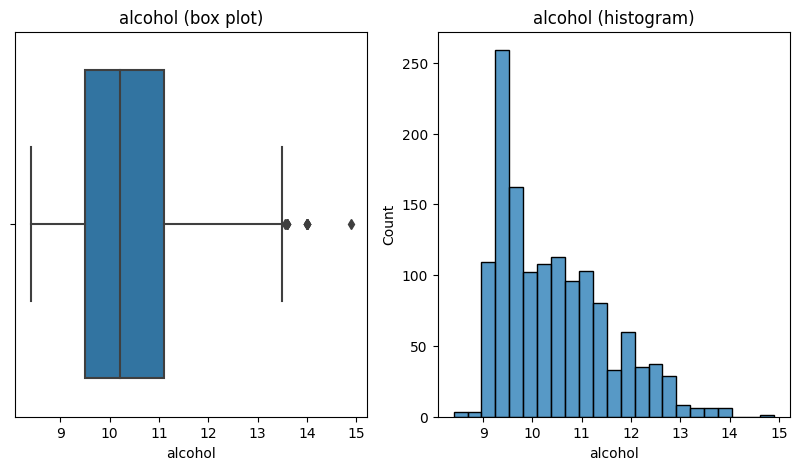

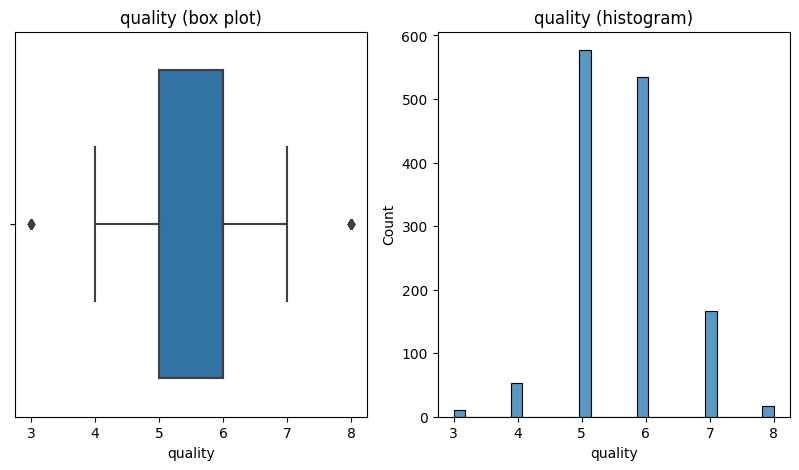

In [9]:
for i in df.columns:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

    sns.boxplot(x=df[i], ax=axs[0])
    axs[0].set_title(i + ' (box plot)')

    sns.histplot(x=df[i], kde=False, ax=axs[1])
    axs[1].set_title(i + ' (histogram)')

    plt.show()

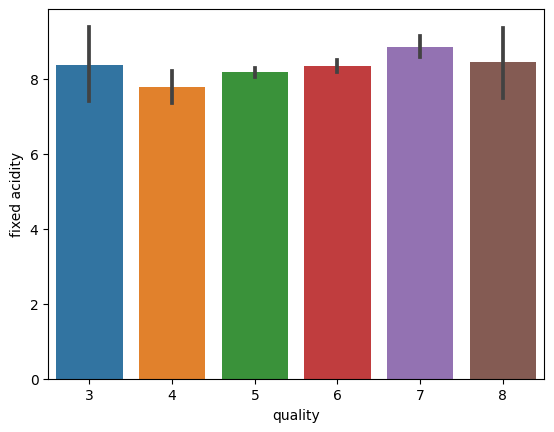

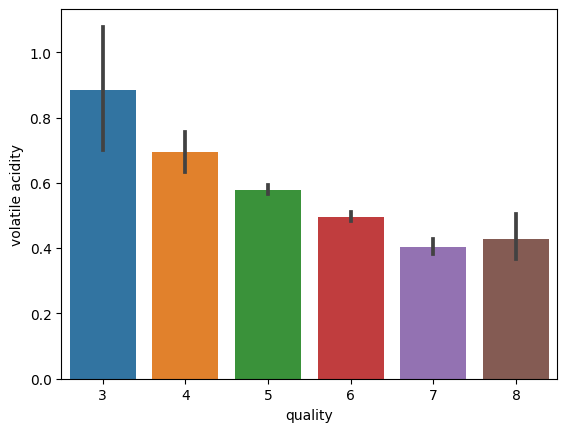

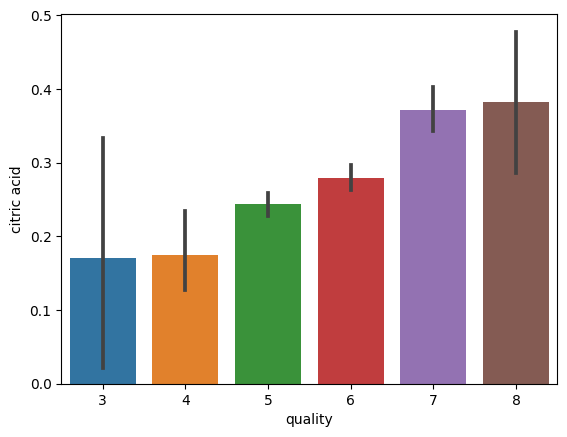

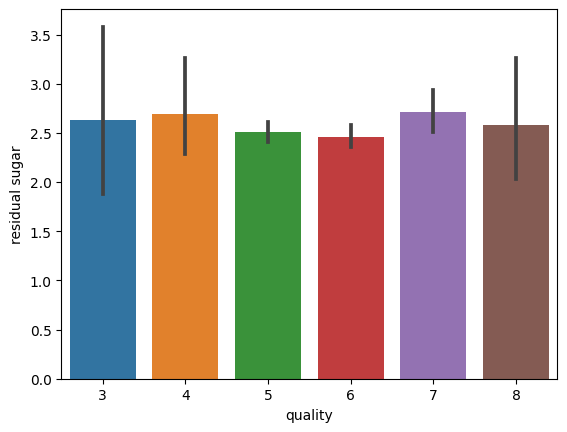

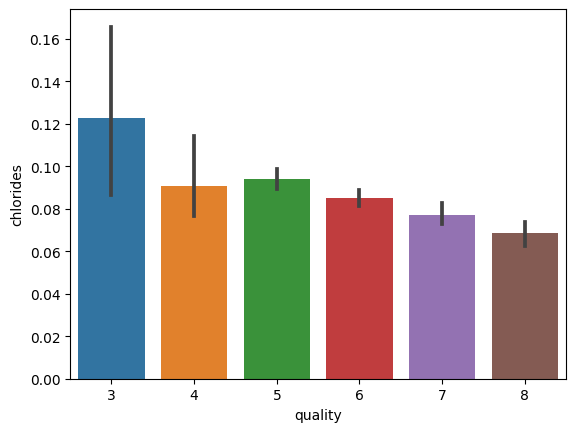

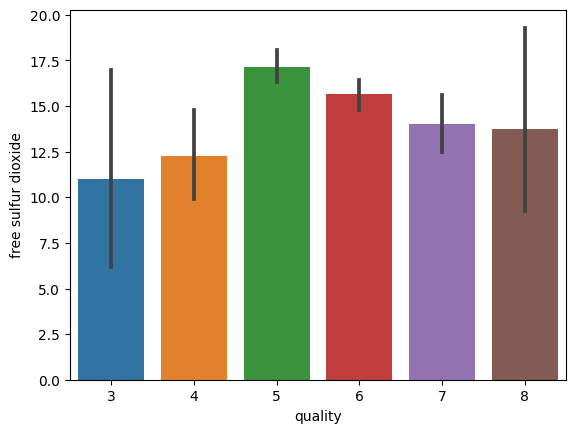

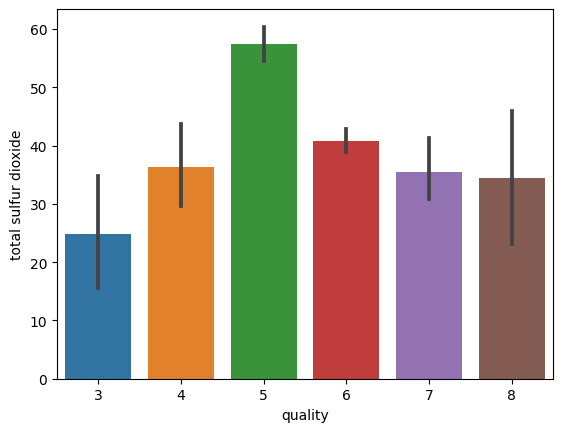

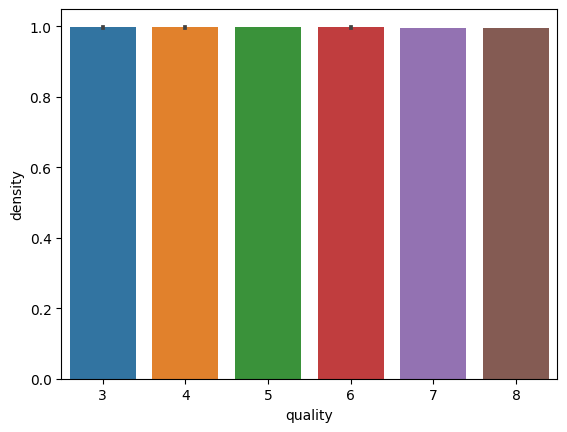

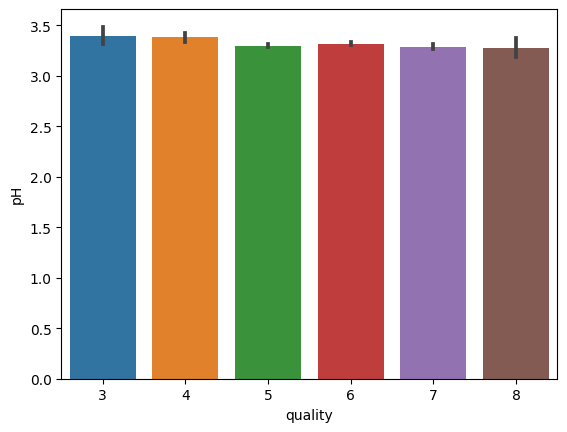

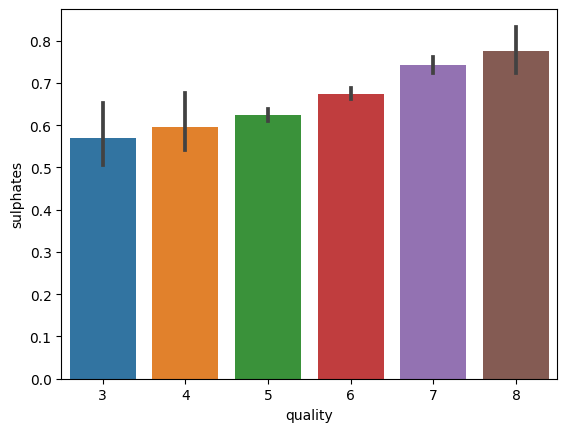

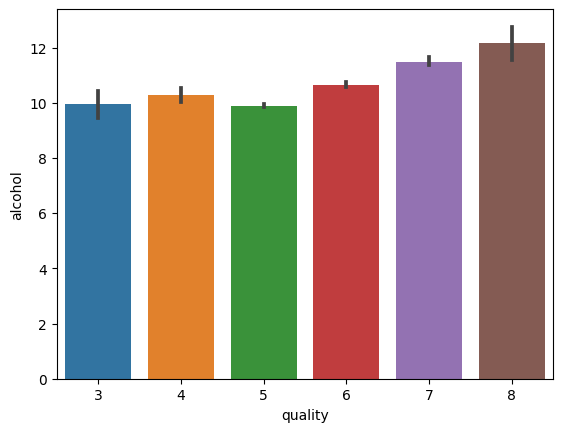

In [10]:
for i in df.columns:
    if i != 'quality':
        sns.barplot(x=df['quality'], y=df[i])
        plt.show()

# Divide the quality of the wine to 3 categories
1 - Bad
2 - Average
3 - Excellent
As the quality column contains only numbers from 3 to 8, then we will split in the following way.
3, 4 --> Bad
5, 6 --> Average
7, 8 --> Excellent

In [11]:
q = []
for i in df['quality']:
    if i in (3, 4):
        q.append('1')
    elif i in (5, 6):
        q.append('2')
    elif i in (7, 8):
        q.append('3')
df['quality'] = q

In [12]:
df['quality'].value_counts()

2    1112
3     184
1      63
Name: quality, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,  LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
x=df.drop('quality', axis=1)
y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [74]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [75]:
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
predictions = dtree.predict(x_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.17      0.13      0.15        15
           2       0.87      0.83      0.85       223
           3       0.37      0.50      0.42        34

    accuracy                           0.75       272
   macro avg       0.47      0.49      0.47       272
weighted avg       0.77      0.75      0.76       272



In [80]:
print(confusion_matrix(y_test,predictions))

[[  2  11   2]
 [ 10 186  27]
 [  0  17  17]]


In [81]:
from IPython.display import Image   
from sklearn.tree import export_graphviz



In [82]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [83]:
from sklearn.externals.six import StringIO 
import pydot 

In [84]:
features = list(df.columns[1:])
features

['volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [85]:
y_pred=dtree.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,precision_score
print("Model Accuracy Score: {}%".format(accuracy_score(y_test,y_pred)*100))

Model Accuracy Score: 75.36764705882352%


In [87]:
from sklearn.metrics import classification_report
print ("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           1       0.17      0.13      0.15        15
           2       0.87      0.83      0.85       223
           3       0.37      0.50      0.42        34

    accuracy                           0.75       272
   macro avg       0.47      0.49      0.47       272
weighted avg       0.77      0.75      0.76       272



In [88]:
report = classification_report(y_test, y_pred, output_dict=True)
precision = report["2"]["precision"]
recall =report["2"]["precision"]
print("\nprecision:", precision)


precision: 0.8691588785046729


In [89]:
print("Reacll:",recall)

Reacll: 0.8691588785046729


In [90]:
fl_score = report["2"]["f1-score"]
print("F1 score:",fl_score)

F1 score: 0.851258581235698


In [91]:
from sklearn.metrics import recall_score
import sklearn.metrics as metrics
recall_sensitivity = metrics.recall_score(y_test,y_pred,average='micro')
recall_specificity = metrics.recall_score(y_test,y_pred,average='macro')
print ( "sensitivity" ,recall_sensitivity)
print ( "Specificity" ,recall_specificity)

sensitivity 0.7536764705882353
Specificity 0.4891380169407075


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import time

# Load the dataset
data = pd.read_csv('winequality-red.csv')

# Define the sizes of the datasets to test
size_percentages = [20, 40, 60, 80, 100]

# Loop through each dataset size and measure training time
for percentage in size_percentages:
    # Get the specified percentage of data
    data_subset = data.sample(frac=percentage/100)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_subset.drop('quality', axis=1), 
                                                        data_subset['quality'], test_size=0.2)
    
    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier()
    
    # Measure the training time
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Compute the accuracy on the testing set
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f"Training time for {percentage}% of data: {training_time:.2f} seconds")
    print(f"Accuracy on testing set: {accuracy:.2f}")


Training time for 20% of data: 0.00 seconds
Accuracy on testing set: 0.48
Training time for 40% of data: 0.00 seconds
Accuracy on testing set: 0.52
Training time for 60% of data: 0.01 seconds
Accuracy on testing set: 0.52
Training time for 80% of data: 0.01 seconds
Accuracy on testing set: 0.64
Training time for 100% of data: 0.01 seconds
Accuracy on testing set: 0.62


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import time

# Generate synthetic classification data
X, y = make_classification(n_samples=1000000, random_state=42)

# Define different sizes for the testing dataset
test_set_sizes = [10,100,200,400]

for size in test_set_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    
    # Create a decision tree classifier and fit it to the training data
    clf = DecisionTreeClassifier(random_state=42)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Test the model on the testing data and measure the prediction time
    start_time = time.time()
    clf.predict(X_test)
    end_time = time.time()
    prediction_time = end_time - start_time
    
    # Print the results
    print(f"Testing set size: {size}")
    print(f"Training time: {training_time:.4f} seconds")
    print(f"Prediction time: {prediction_time:.4f} seconds")
    print("=" * 30)


In [ ]:
exit()

In [92]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import time

# Generate synthetic classification data
X, y = make_classification(n_samples=1000000, random_state=42)

# Define different sizes for the testing dataset
test_set_sizes = [10, 100, 200]

for size in test_set_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    
    # Create a decision tree classifier and fit it to the training data
    clf = DecisionTreeClassifier(random_state=42)
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Test the model on the testing data and measure the prediction time
    start_time = time.time()
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    end_time = time.time()
    prediction_time = end_time - start_time
    
    # Calculate the misclassification rate for the training and testing datasets
    misclassification_rate_train = sum(y_pred_train != y_train)/len(y_train)
    misclassification_rate_test = sum(y_pred_test != y_test)/len(y_test)
    
    # Print the results
    print(f"Testing set size: {size}")
    print(f"Training time: {training_time:.4f} seconds")
    print(f"Prediction time: {prediction_time:.4f} seconds")
    print(f"Misclassification rate for training dataset: {misclassification_rate_train:.4f}")
    print(f"Misclassification rate for testing dataset: {misclassification_rate_test:.4f}")
    print("=" * 30)

Testing set size: 10
Training time: 185.6835 seconds
Prediction time: 0.3602 seconds
Misclassification rate for training dataset: 0.0000
Misclassification rate for testing dataset: 0.0000
Testing set size: 100
Training time: 172.4648 seconds
Prediction time: 0.3217 seconds
Misclassification rate for training dataset: 0.0000
Misclassification rate for testing dataset: 0.0700
Testing set size: 200
Training time: 189.9577 seconds
Prediction time: 0.3211 seconds
Misclassification rate for training dataset: 0.0000
Misclassification rate for testing dataset: 0.0550
